In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**imports**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import f1_score #F1_score = dice
from sklearn.metrics import precision_recall_fscore_support as score
import cv2
import os

**reading images**

In [0]:
def read_image(path, image_name):
  img=mpimg.imread(path + image_name)
  return img
  #plt.imshow(img[:,:,:])   
  # check labels values
  #print(img[0,0,:])
  #print(img[100,70,:])
  #print(img[150,70,:])


**color statistics** - לחרטט שעשינו סטטיסטיות כדי לקבוע טרשהולד אדפטיבי לכל קלאס.
בנוסף, שעשינו רשת עושה אופטימיזציה לטרשהולד עם לוס של דייס.

In [0]:
'''
bg_location = np.where(img[:,:,0] >= 0.1)
liver_location = np.where(img[:,:,1] >= 0.1)
lesion_location = np.where(img[:,:,2] >= 0.1)

print(256*256 - len(bg_location[0]) - len(liver_location[0]) -len(lesion_location[0]))


bg_values = img[bg_location][:,0]
liver_values = img[liver_location][:,1]
lesion_values = img[lesion_location][:,2]

'''
#plt.hist(bg_values, bins='auto')  # arguments are passed to np.histogram
#plt.title("Histogram with 'auto' bins")
#plt.show()

#plt.hist(liver_values, bins='auto')  # arguments are passed to np.histogram
#plt.title("Histogram with 'auto' bins")
#plt.show()

#plt.hist(lesion_values, bins='auto')  # arguments are passed to np.histogram
#plt.title("Histogram with 'auto' bins")
#plt.show()


'\nbg_location = np.where(img[:,:,0] >= 0.1)\nliver_location = np.where(img[:,:,1] >= 0.1)\nlesion_location = np.where(img[:,:,2] >= 0.1)\n\nprint(256*256 - len(bg_location[0]) - len(liver_location[0]) -len(lesion_location[0]))\n\n\nbg_values = img[bg_location][:,0]\nliver_values = img[liver_location][:,1]\nlesion_values = img[lesion_location][:,2]\n\n'

**labeling black pixels** - get discrete values from continuous image


In [0]:
def label_image_pixels(image):
  TRESHOLD = 0.7

  bg_location = np.where((image[:,:,0] > image[:,:,1]) & (image[:,:,0] > image[:,:,2]) & (image[:,:,0] >= TRESHOLD))
  liver_location = np.where((image[:,:,1] > image[:,:,0]) & (image[:,:,1] > image[:,:,2]) & (image[:,:,1] >= TRESHOLD))
  lesion_location = np.where((image[:,:,2] > image[:,:,0]) & (image[:,:,2] > image[:,:,1]) & (image[:,:,2] >= TRESHOLD))
  no_label = np.where((image[:,:,0] < TRESHOLD)&(image[:,:,1] < TRESHOLD)&(image[:,:,2] < TRESHOLD))

  
  
  new_image = np.array(image)
  new_image = np.zeros((256,256))
  
  #plt.imshow(img[:,:,:])   
  #plt.show()

  new_image[bg_location] = 0
  new_image[lesion_location] = 255
  new_image[liver_location] = 127
  new_image[no_label] = 127
  
  
  return new_image
  #print(256*256 - len(bg_location[0]) - len(liver_location[0]) -len(lesion_location[0]) - len(no_label[0]))




**resize images**

In [0]:
def resize_image(image):
  width = 512

  # segmentation
  seg = np.array(image)
  seg_reshaped = cv2.resize(seg,(width,width),interpolation = cv2.INTER_NEAREST)

  return seg_reshaped
  #print('original image size:', np.array(seg).shape)
  #plt.title("original")
  #plt.imshow(seg, cmap='gray')
  #plt.show()

  #print('reshaped image size:', np.array(seg_reshaped).shape)
  #plt.title("reshaped")
  #plt.imshow(seg_reshaped, cmap='gray')
  #plt.show()



**compare Iou**

In [0]:
def evaluation(predicted, ground_truth):
  predicted = np.around(seg_reshaped.ravel())
  ground_truth = np.around(seg_reshaped.ravel())

  precision, recall, dice, _ = score(ground_truth, predicted)

  #plt.title('classes distribution')
  #plt.hist(predicted, bins='auto')
  #plt.show()

  print('precision: {}'.format(precision))
  print('recall: {}'.format(recall))
  print('dice: {}'.format(dice))




**write predictions to directory**

In [0]:
def write_image_to_directory(path, image_name):
  pass
  
  

**main**

image: train_2.png


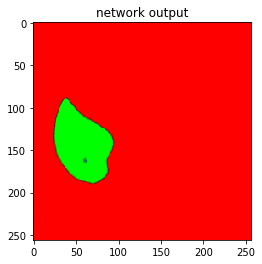

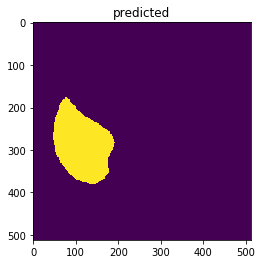

image: train_8.png


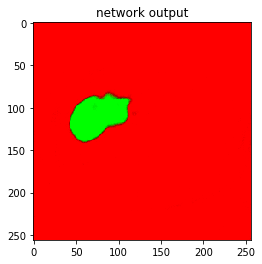

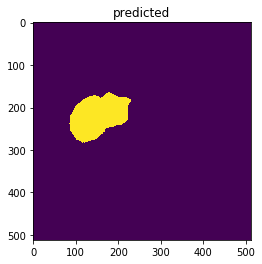

image: train_6.png


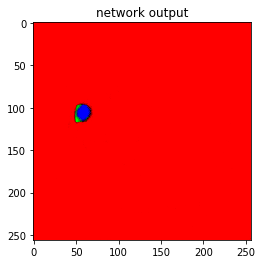

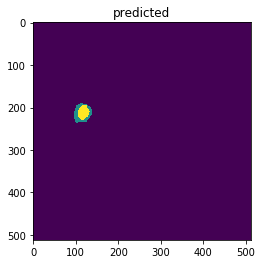

image: train_5.png


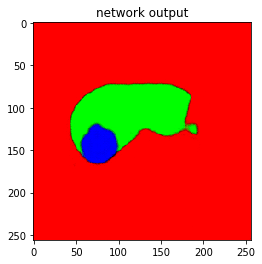

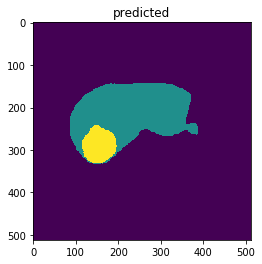

image: train_7.png


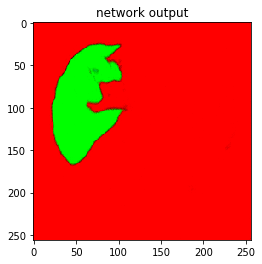

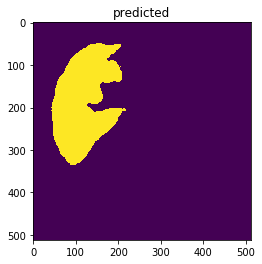

image: train_3.png


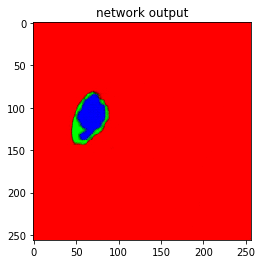

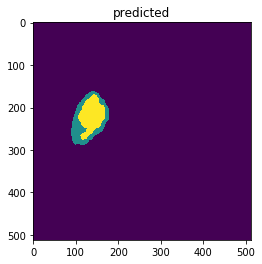

image: train_4.png


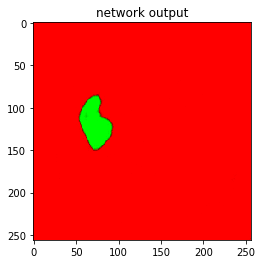

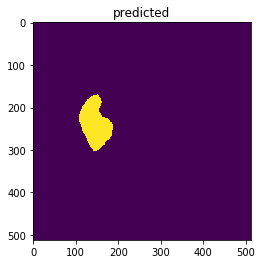

image: train_9.png


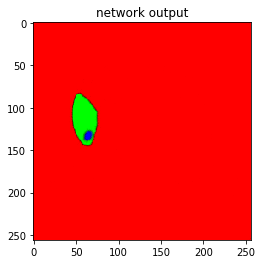

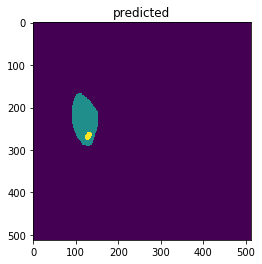

image: train_1.png


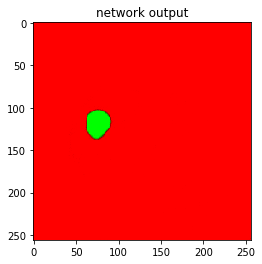

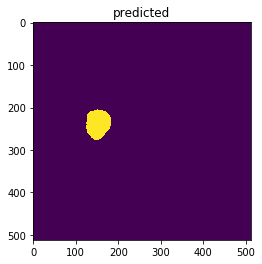

image: train_0.png


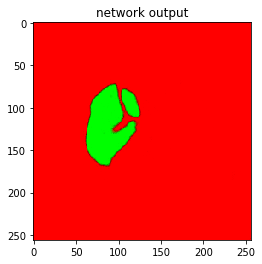

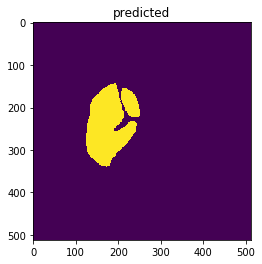

In [0]:
path = '/content/drive/My Drive/bio_proj_2019_drive/images_for_post_proc/'
predicted_dir = path + 'predicted/'
ground_truth_dir = path + 'ground_truth/'
final_predictions_dir = path + 'testseg/'

predicted_images_names = [name for name in os.listdir(predicted_dir)]
ground_truth_images_names = [name for name in os.listdir(ground_truth_dir)]

for predicted_image_name in predicted_images_names:
  
  print('image:', predicted_image_name)
  
  predicted_image = read_image(predicted_dir, predicted_image_name)
  
  plt.title('network output')
  plt.imshow(predicted_image)
  plt.show()
  
  labeled_predicted = label_image_pixels(predicted_image)
  
  resized_predicted = resize_image(labeled_predicted)
  
  plt.title('predicted')
  plt.imshow(resized_predicted, cmap='gray')
  plt.show()
  
  for ground_truth_images_name in ground_truth_images_names:
    if ground_truth_images_name.split('_')[1] == predicted_image_name.split('_')[1]:
      
      plt.title('ground truth')
      plt.imshow(resized_predicted, cmap='gray')
      plt.show()
      
      evaluation(resized_predicted, read_image(ground_truth_dir, ground_truth_images_name))
      break
      
      write_image_to_directory(final_predictions_dir, )
      
    